# 图像上的算术运算

## 图像加法

In [10]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np

x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x, y)) # 250+10 = 260 => 255
print(x + y) # 250+10 = 260 % 256 = 4

[[255]]
[4]


## 图像混合

函数 cv2.addWeighted() 可以按下面的公式对图片进行混合操作

dst = α · img1 + β · img2 + γ

In [5]:
import cv2
import numpy as np

img1 = cv2.imread("lena.jpg")
img2 = cv2.imread("football.png")

dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

cv2.imshow("des", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
img1.shape

(512, 512, 3)

## 按位运算

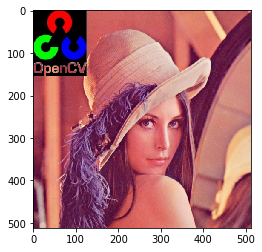

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread("lena.jpg")
img2 = cv2.imread("OpenCV.png")

rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 175, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
# 取 roi 中与 mask 中不为零的值对应的像素的值，其他值为 0
# 注意这里必须有 mask=mask 或者 mask=mask_inv, 其中的 mask= 不能忽略
img1_bg = cv2.bitwise_and(roi, roi, mask = mask)
# 取 roi 中与 mask_inv 中不为零的值对应的像素的值，其他值为 0。
# Take only region of logo from logo image
img2_fg = cv2.bitwise_and(img2, img2, mask = mask_inv)

dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst

img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
plt.imshow(img1, "gray")